Multiplicity - binomial

nCr - # of ways r things can be put in n slots. g(N,t) in kittel

binomial distribution variance $np(1-p)$



Microstate notation

$(\uparrow + \downarrow)$ or more generally $(p+q)^N = \sum_{n=0}^{N} {N\choose{n}} p^n q^{N-n}$ Probability of all outcomes

In [3]:
from math import comb
comb(4, 2) * .5**2*.5**2

0.375

Feynman trick $np^n = p \frac{\partial}{\partial p} \left( p^n \right)$

The important part: $\langle n^2 \rangle$

$$
\langle n^2 \rangle = \sum_{n=0}^N {N \choose n} n^2  p^n q^{N-n} = \left( p \frac{\delta}{\delta p} \right)^2 \sum_{n=0}^N {N \choose n}   p^n q^{N-n}
\\ = \left( p \frac{\delta}{\delta p} \right)^2 \left( p+ q\right)^N = pN + p^2 N(N-1) 
\\ = (Np)^2 + Npq
$$

$$
\langle (n-\langle n \rangle)^2 \rangle = \langle n^2 \rangle - \langle n \rangle^2 = (Np)^2 + Npq - (Np)^2 = Npq
$$
variance

Stirling approximation (it's pretty good) $\ln(N!) \approx \frac{1}{2} \ln(2\pi) + (N+\frac{1}{2}) \ln(N) - N$

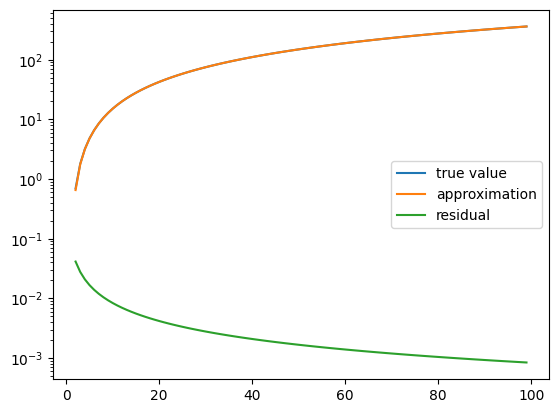

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, log
from scipy.special import factorial

N = np.arange(2, 100)
direct_calc = log(factorial(N))
approx_calc = 1/2 * log(2*pi) + (N+1/2)*log(N) - N

plt.plot(N, direct_calc, label='true value')
plt.plot(N, approx_calc, label='approximation')
plt.plot(N, direct_calc-approx_calc, label='residual')
plt.yscale('log')
plt.legend();

g multiplicity

$$
g(N,s) = \frac{N!}{(N-s)! s!} = \frac{N!}{N_A! N_B!} \\
g(N,s) \approx g(N,0) e^{-2s^2/N} \\ g(N,0) \approx \sqrt{\frac{2}{\pi N}} 2^N \\
g(N,s) = \sum_{s_1} g_1 (N_1,s_1) g_2 ( N_2, s-s_2) \\
g(N,U) = \sum_{U_1} g_1 (N_1,U_1) g_2 (N_2, U_2),\ U = U_1 + U_2
$$

Total energy is conserved $\checkmark$

$g_1 g_2$

Thermal equilibrium is when $g_1g_2$ is maximized

$$
d(g_1,g_2) = 
\left(\frac{\partial(g_1,g_2)}{\partial U_1} \right)_{N_1, N_2} dU_1 + 
\left(\frac{\partial(g_1,g_2)}{\partial U_2} \right)_{N_1, N_2} dU_2 \\
=
g_2 \frac{\partial g_1}{\partial U_1} dU_1 + g_1\frac{\partial g_2}{\partial U_2} dU_2
$$

The little $N_1,N_2$ indicate these values are held constant

When is $d(g_1, g_2)$ minimized? Let's separate

$$
\frac{1}{g_1} \frac{\partial g_1}{\partial U_1} - \frac{1}{g_2} \frac{\partial g_2}{\partial U_2} = 0 \\
\frac{\partial \ln(g_1)}{\partial U_1} =\frac{\partial \ln(g_2)}{\partial U_2}\\
\frac{1}{\tau_1} = \frac{1}{\tau_2}
$$
temperature achieved

Next: entropy (also just dropped in our lap for now)

$$
\sigma(N,U) = \ln g(N,U)
$$

Entropy $\sigma$ is unitless. Note that fundamental temperature $\tau$ has energy units since $g$ is unitless. $\tau = K_B T$

We translate from $\sigma$ to $S$ using $S = K_B \sigma$

Bonus: $\tau = \frac{\partial U}{\partial \sigma}_N$ Not common.

More common: $\frac{1}{\tau} = \frac{\partial \sigma}{\partial U}_N$

This definition mean cold systems change entropy quickly, while hot systems change entropy slowly with respect to energy

----

Entropy

$g_{tot} = g_1 g_2$ but $\sigma_{tot} = \sigma_1 + \sigma_2$ Entropy adds.

In practice we can't say as much when we're out of equilibrium.

$$
\sigma_{tot} = \ln(g_{tot}) = \ln\left(\sum_{U_1} g_1 g_2\right)
$$

If one state is much bigger than the rest, we can focus on that one
$$
\sigma_{tot} \approx \ln(\hat g_1 \hat g_2) \approx \ln(\hat g_1) + \ln(\hat g_2) = \sigma_1^{eq} + \sigma_2^{eq}
$$

We can use entropy to describe heat flow

$$
d \sigma_{tot} = d \sigma_1 + d \sigma_2 \\
= \frac{\partial \sigma_1}{\partial U_1 } \delta U_1 + \frac{\partial \sigma_2}{\partial U_2 } \delta U_2 \\
$$
Note that $\delta U_2 = -\delta U_1 $
$$
d \sigma_{tot} =\left(\frac{1}{\tau_1} - \frac{1}{\tau_2} \right) \delta U_1
$$

So entropy increases if heat flows from hot to cold, decreases if opposite

Laws (not postulates) of thermodynamics

0. If a and b are in equilibrium with c, they are in equilibrium
1. Heat = Energy kinda
2. If a state changes, entropy with stay constant/increase (usually)
3. It definitely stays the same

---

Thermal contact & reservior

If we have a reservoir R with temp $\tau$ and total energy $U-\epsilon_s$ in contact with our system $S$ with energy $\epsilon_s$, probably the same temperature?

How likely is $S$ in state $s$ with energy $\epsilon_s$?

$$
g_R(U_0 - \epsilon_s) \times 1 = g_{tot} \\
P(\epsilon_s) \propto g_R(U-\epsilon_s)
$$
Great all we need is $g_R$ as a function of energy. We'll get there.

Acutally, we're going to pull the $\epsilon_s$ out of this.
<details>

$$
\ln(g_R(U_0)-\epsilon_s) \approx \ln(g_R (U_0)) - \epsilon_s \left(\frac{\partial \ln g(U)}{\partial U} \right)_{V,N} + \dots \\
\approx \ln(g_R(U_0)) - \epsilon_s\frac{1}{\tau} \\
$$
Going back up via exponentiation gives us our final result
</details>

$$
g_R(U-\epsilon_s) \approx g_R(U) e^{-\epsilon_s/\tau} \\
P(\epsilon_s) \propto e^{-\epsilon_s/\tau}
$$



$$
\tau = \frac{1}{40} \\
E_1 = -13.6 \\
E_2 = -3.4 \\

% 40 = \frac{d \sigma}{d U} \\
% \sigma(U) = 40U \\
% \ln(g(U)) = 40U \\
% g(U) = e^{40U} \\
$$



In [7]:
from numpy import exp
print(exp(3.4*40) / exp(13.6*40))

6.424678257926741e-178


---
Partition function

$$
Z = \sum_{s'} e^{-\epsilon_s'/T} \\
\langle X \rangle \equiv \sum_s X_s P(s) = \frac{\sum_s X_s e^{-\epsilon_s/T}}{Z} \\
\langle \epsilon \rangle \equiv \mathcal{U} %yippie 
$$
Apply derivative
$$
\mathcal{U}  = \dfrac{\tau^2 \frac{\partial}{\partial \tau} \sum_s e^{-\epsilon_s/\tau}}{Z} = \tau^2 \dfrac{\partial \ln Z}{\partial\tau} \\
\beta \equiv \frac{1}{\tau} \rightarrow \mathcal{U} = - \frac{\partial \ln Z}{\partial \beta}
$$

Okay, how do we find the fluxuations (std)?

$$
\langle \epsilon^2 \rangle = \frac{\frac{\partial^2 Z}{\partial \beta^2}}{Z} \\
\langle (\Delta \epsilon)^2 \rangle = \frac{1}{Z} \frac{\partial^2 Z}{\partial \beta^2} - \left(\frac{d \ln Z}{\partial \beta} \right)^2 = \frac{\partial^2 \ln Z}{\partial \beta^2}
$$

Microcanonical ensemble: 

multiplicity of $g(U,V,N)$ is probability of a quantum state <br>
$\sigma(U,N,V) = \ln(g)$ <br>
$\beta = \frac{\partial \sigma}{\partial U}_{N,V}$

Requires constant particles

Canonical ensemble: 

$Z = \sum_s e^{-\epsilon_s/\tau}$<br>
$P(s) = \frac{e^{-\epsilon_s \beta}}{Z}$ <br>
$\mathcal U = - \frac{\partial \ln Z}{\partial \beta}$ <br>

Requires that we're in contact with a thermal reservior

Grand Canonical ensemble:

$?$

Particles can change

---
Extensive qantities scale with size (total energy), intensive dosen't scale (avg energy). A reversible process occurs when system remains at equilibrium throughout the process.

Reversible processes transform states, they do not move particles between states. Quantized energy levels should smoothly transfom to neq energy levels

---

# Pressure

So far: constant N, V. Now we'll vary V (reversibly) (change state properties but stay in the same state)

Microcanonical
$$
\epsilon_s(V-\Delta V) = \epsilon_s(V) - \frac{\partial \epsilon_s}{\partial V} \Delta V \\
\Delta \epsilon_s = - \frac{\partial \epsilon_s}{\partial V}  \Delta V \\
W = p_s \Delta V = \Delta \epsilon_s 
$$
So we can have energy change, but entropy actually stays the same. This makes sense since we're reversible
$$
p_s = -\frac{\partial \epsilon_s}{\partial V} \\
\langle p_s \rangle = -\frac{\partial U}{\partial V}_{N,\sigma} \\
$$

Now $\sigma$ is independent instead of dependent. We can flip our $1/\tau$

$$
\tau = \frac{\partial U}{\partial \sigma} \\
d U = \frac{\partial U}{\partial \sigma} _{V,N} d\sigma + \frac{\partial U}{V}_{\sigma,N} dV + \frac{\partial U}{\partial N}_{\sigma,V} dN \\
dU = \tau dS + pdV + 0
$$


Let's put some particles in boxes.


Work is done ~by~ the system

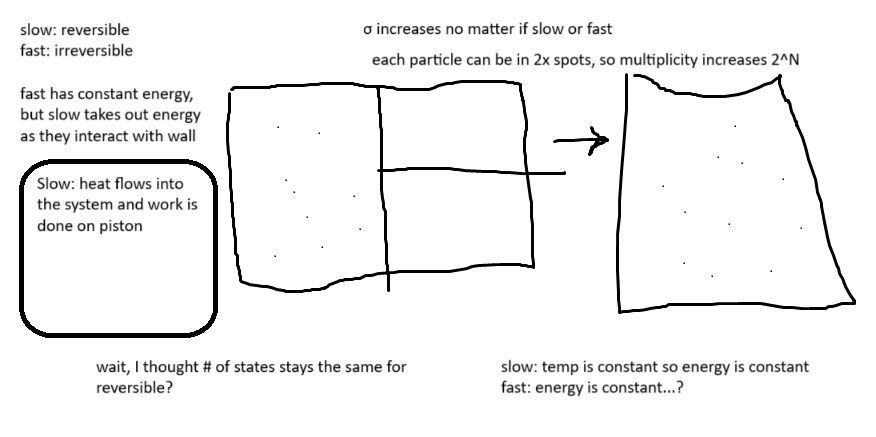